Signal 1 loaded.
Signal 2 loaded.


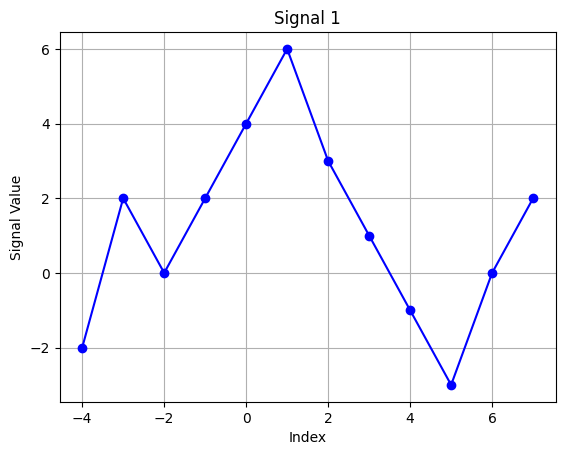

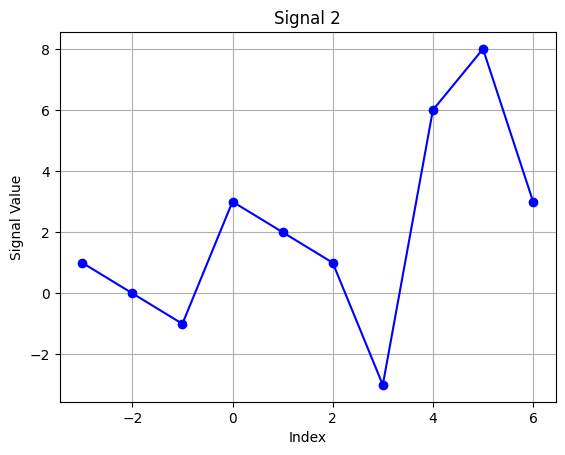

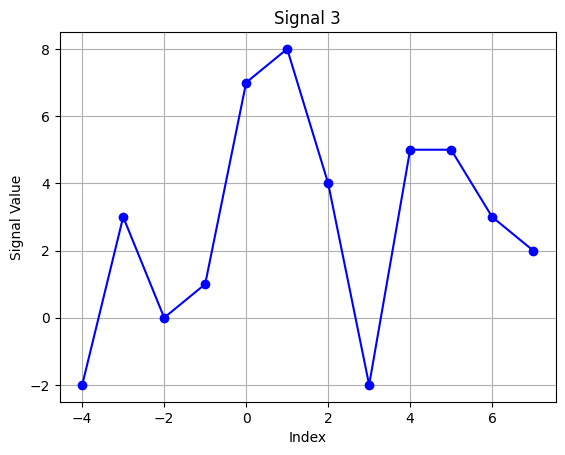

Signal 4 loaded.


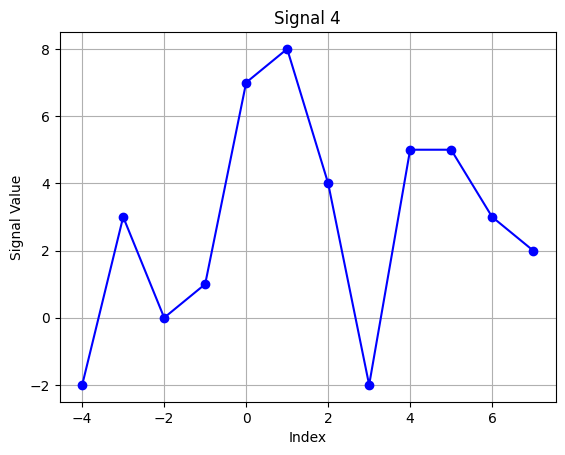

Signal 5 loaded.


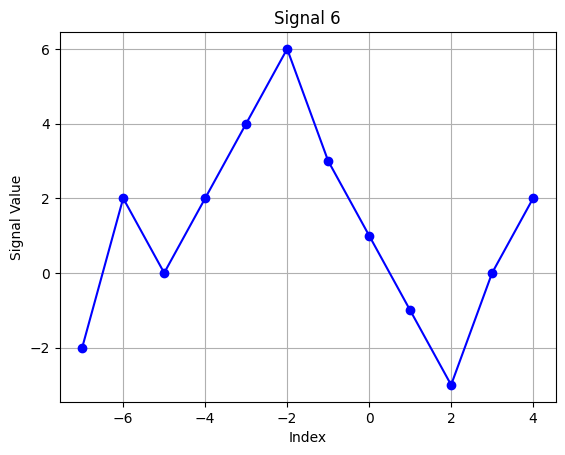

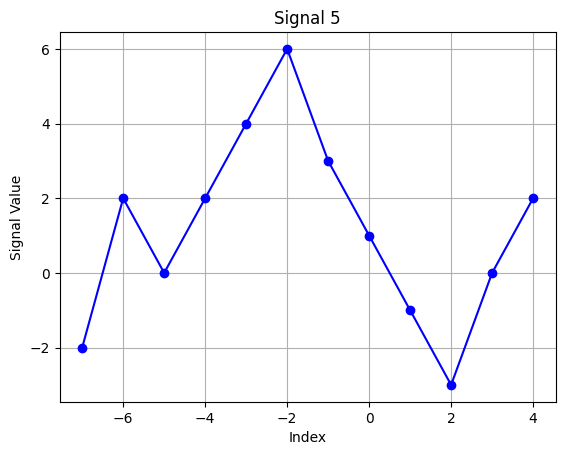

Signal 7 loaded.


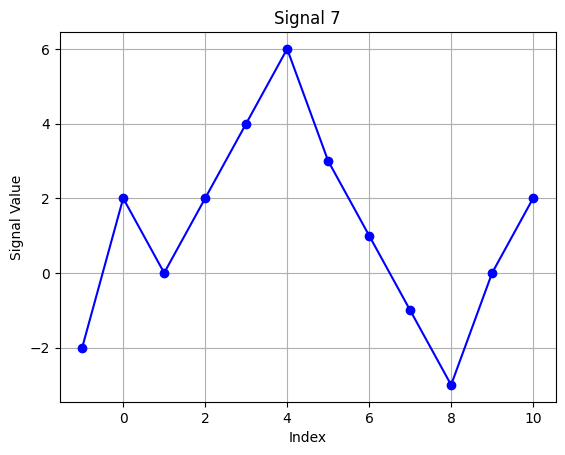

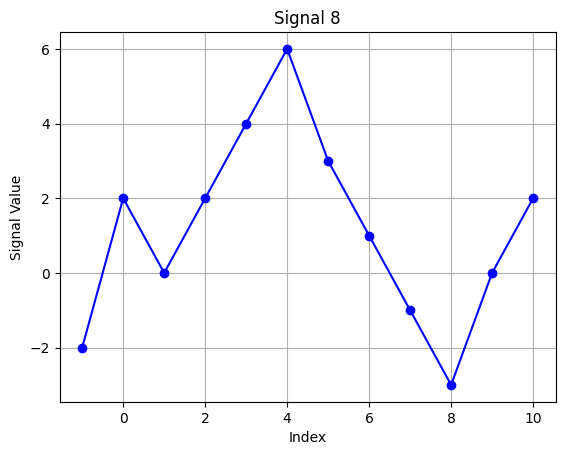

Signal 9 loaded.


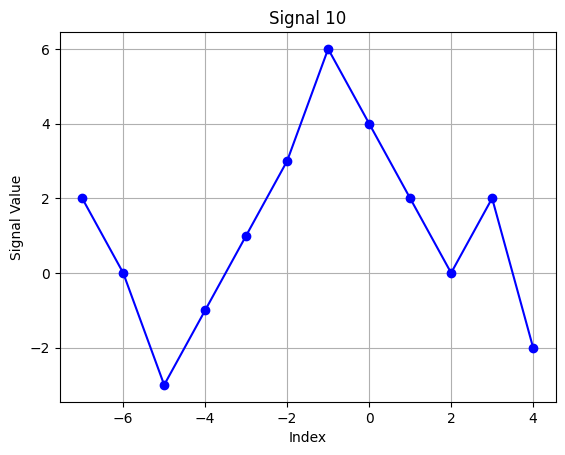

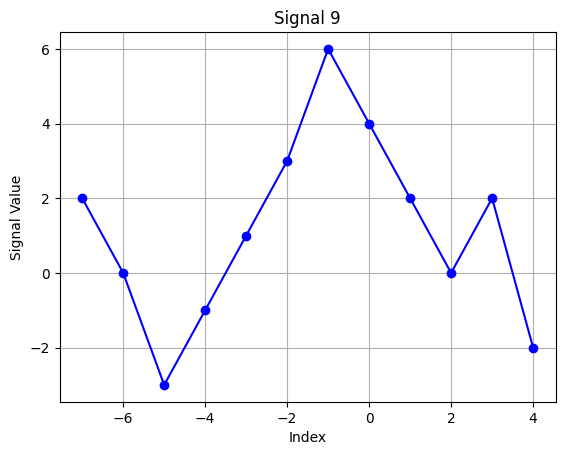

Signal 11 loaded.


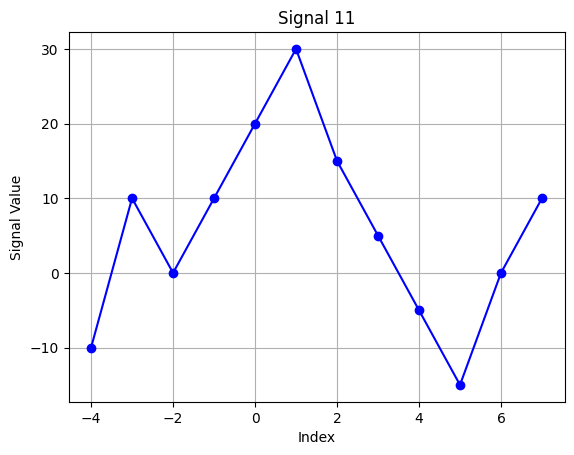

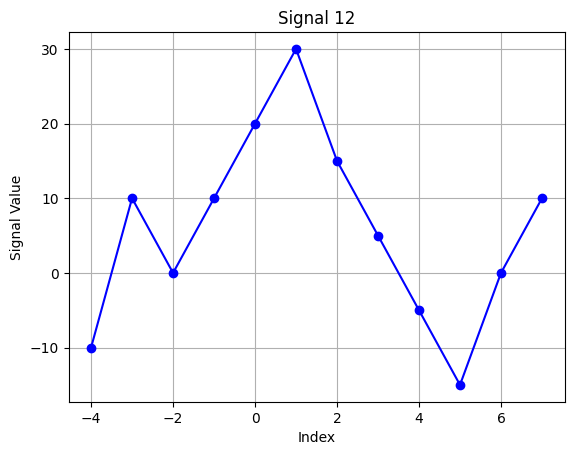

Signal 13 loaded.


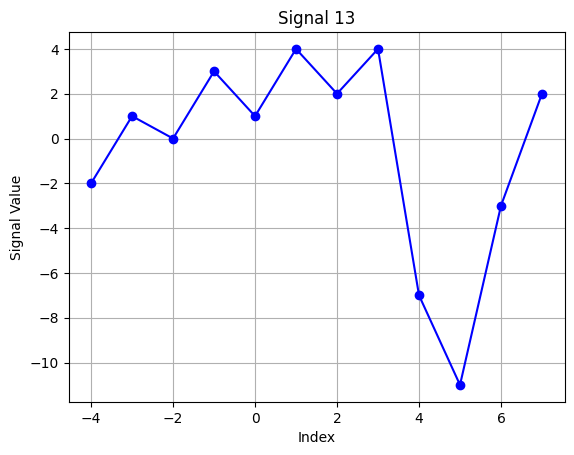

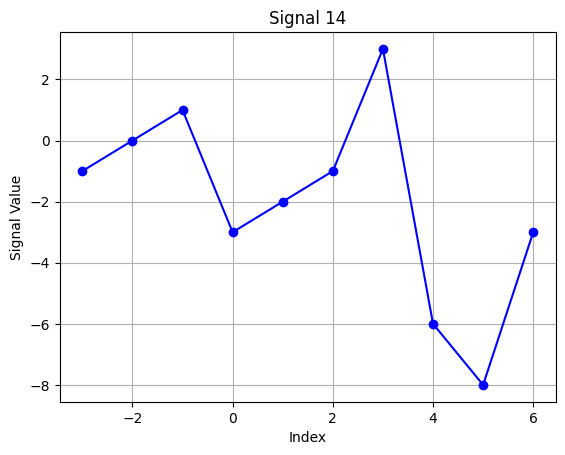

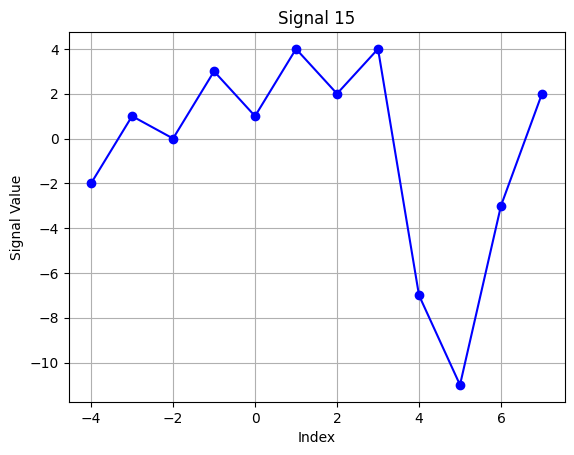

Signal 16 loaded.


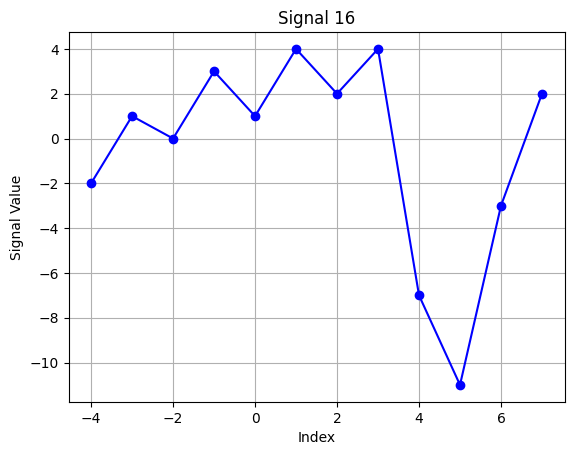

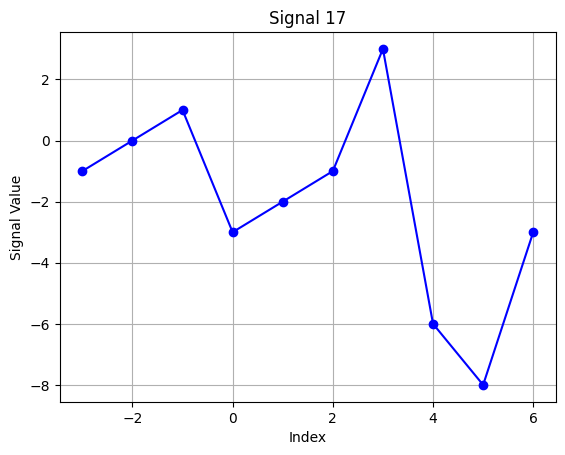

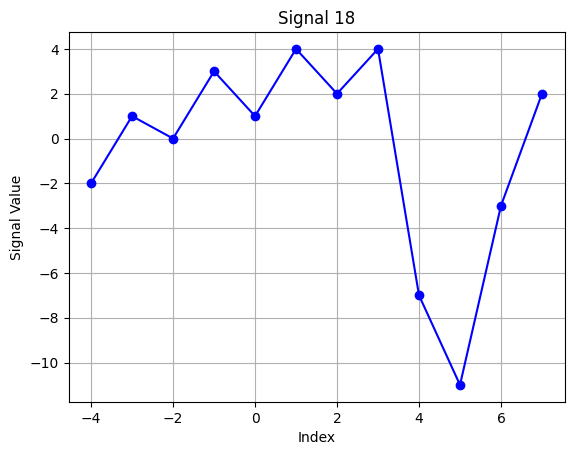

In [2]:
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt

# Global array to hold the signals
signals = []

# Function to read the signal from the text file
def read_signal():
    file_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
    if not file_path:
        return
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    N = int(lines[2].strip())  # First row: number of samples
    indices = []
    values = []
    
    for i in range(3, N + 3):
        parts = lines[i].strip().split()
        indices.append(int(parts[0]))  # Sample index
        values.append(float(parts[1]))  # Sample value

    signals.append([indices, values])
    print(f"Signal {len(signals)} loaded.")

# Function to plot a signal
def plot_signal(signal_index):
    plt.figure()
    plt.plot(signals[signal_index][0], signals[signal_index][1], marker='o', linestyle='-', color='b')
    plt.xlabel('Index')
    plt.ylabel('Signal Value')
    plt.title(f'Signal {signal_index + 1}')
    plt.grid(True)
    plt.show()

# Function to add two signals
def add_signals(signal1_index, signal2_index):
    indices1, values1 = signals[signal1_index]
    indices2, values2 = signals[signal2_index]

    combined_indices = sorted(set(indices1 + indices2))
    combined_values = []

    for idx in combined_indices:
        val1 = values1[indices1.index(idx)] if idx in indices1 else 0
        val2 = values2[indices2.index(idx)] if idx in indices2 else 0
        combined_values.append(val1 + val2)
    
    signals.append([combined_indices, combined_values])
    plot_signal(len(signals) - 1)

# Function to multiply a signal by a constant
def multiply_signal(signal_index, constant,view=1):
    indices, values = signals[signal_index]
    new_values = [val * constant for val in values]
    signals.append([indices, new_values])
    if view:
        plot_signal(len(signals) - 1)

# Function to subtract two signals
def subtract_signals(signal1_index, signal2_index):
    multiply_signal(signal2_index, -1,0)
    add_signals(signal1_index, len(signals) - 1)

# Function to shift a signal by k steps
def shift_signal(signal_index, k):
    indices, values = signals[signal_index]
    k *= -1
    new_indices = [idx + k for idx in indices]
    signals.append([new_indices, values])
    plot_signal(len(signals) - 1)

# Function to fold/reverse a signal
def fold_signal(signal_index):
    indices, values = signals[signal_index]
    new_indices = [-idx for idx in indices]
    pairs = []
    for i in range(len(new_indices)):
        pairs.append((new_indices[i], values[i])) 
    sorted_pairs = sorted(pairs, key=lambda pair: pair[0])
    new_indices = []
    new_values = []
    for pair in sorted_pairs:
        new_indices.append(pair[0])
        new_values.append(pair[1])
    signals.append([new_indices, new_values])
    plot_signal(len(signals) - 1)

# Function to save the last generated signal to a text file
def save_signal():
    if not signals:
        print("No signal to save!")
        return
    
    file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt")])
    if not file_path:
        return

    indices, values = signals[-1]
    with open(file_path, 'w') as file:
        file.write(f"{len(indices)}\n")
        for idx, val in zip(indices, values):
            file.write(f"{idx} {val}\n")
    print(f"Signal saved to {file_path}")

# Creating the main Tkinter window
root = tk.Tk()
root.title("Signal Reader")

# Set the window size to fill the screen (without hiding the title bar)
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
root.geometry(f"{int(screen_width)}x{screen_height}")

# Entry fields for signal index and operation value
signal_number_label = tk.Label(root, text="Signal One Number:")
signal_number_label.grid(row=0, column=0, padx=5, pady=5)
signal_number_entry = tk.Entry(root)
signal_number_entry.grid(row=0, column=1, padx=5, pady=5)

operation_value_label = tk.Label(root, text="Operation Value/Signal Two Number:")
operation_value_label.grid(row=0, column=2, padx=5, pady=5)
operation_value_entry = tk.Entry(root)
operation_value_entry.grid(row=0, column=3, padx=5, pady=5)

# Buttons for signal operations
button_read = tk.Button(root, text="Read Signal", command=read_signal)
button_read.grid(row=1, column=0, padx=5, pady=10)

button_display = tk.Button(root, text="View Signal", command=lambda: plot_signal(int(signal_number_entry.get()) - 1))
button_display.grid(row=1, column=1, padx=5, pady=10)

button_add = tk.Button(root, text="Add Signals", command=lambda: add_signals(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()) - 1))
button_add.grid(row=2, column=0, padx=5, pady=10)

button_multiply = tk.Button(root, text="Multiply Signal", command=lambda: multiply_signal(int(signal_number_entry.get()) - 1, float(operation_value_entry.get())))
button_multiply.grid(row=2, column=1, padx=5, pady=10)

button_subtract = tk.Button(root, text="Subtract Signals", command=lambda: subtract_signals(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()) - 1))
button_subtract.grid(row=3, column=0, padx=5, pady=10)

button_shift = tk.Button(root, text="Shift Signal", command=lambda: shift_signal(int(signal_number_entry.get()) - 1, int(operation_value_entry.get())))
button_shift.grid(row=3, column=1, padx=5, pady=10)

button_fold = tk.Button(root, text="Fold Signal", command=lambda: fold_signal(int(signal_number_entry.get()) - 1))
button_fold.grid(row=4, column=0, padx=5, pady=10)

# Button to save the output signal
button_save = tk.Button(root, text="Save Signal", command=save_signal)
button_save.grid(row=4, column=1, padx=5, pady=10)

# Start the Tkinter event loop
root.mainloop()
